In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Trabalho DataSet/2022-10-01_156_-_Base_de_Dados-limpo.csv',
                      sep=',', encoding='utf-8',)

In [16]:
df.head(10)

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,...,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,IDADE,LOGRADOURO_ASS\t
0,9671001,Solicitação,Instituto das cidades inteligentes,2022-01-09,09:04:31,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Paulo De Deus Bessa, 667",Santo Inacio,...,Esquina com estrada mina do ouro,F,Santo Inácio,Unidade Regional Santa Felicidade,1947-12-11,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,75,"Rua Paulo De Deus Bessa, 667"
1,9670915,Solicitação,Instituto das cidades inteligentes,2022-01-09,07:53:25,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Leonardo Krasinski, 0",Boa Vista,...,"Esquina com a rua leão sallum, 1395. ciente do...",F,Boa Vista,Unidade Regional Boa Vista,1958-07-27,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,64,"Rua Leonardo Krasinski, 0"
2,9671138,Solicitação,Instituto das cidades inteligentes,2022-01-09,10:02:18,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Érico José De Mio, 21",Campina Do Siqueira,...,Obs: galhos de palmeira.,F,Campina Do Siqueira,Unidade Regional Santa Felicidade,1940-05-08,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,82,"Rua Érico José De Mio, 21"
3,9671072,Solicitação,Instituto das cidades inteligentes,2022-01-09,09:35:03,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Maria Madalena De Miranda Wolfart, 107",Boa Vista,...,"Cidadã ciente dos procedimentos de coleta, ins...",F,Boa Vista,Unidade Regional Boa Vista,1954-10-26,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,68,"Rua Maria Madalena De Miranda Wolfart, 107"
4,9671351,Solicitação,Instituto das cidades inteligentes,2022-01-09,11:28:00,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Juvenal Carvalho, 80",Fazendinha,...,Material ensacado em frente ao endereço.,F,Fazendinha,Unidade Regional Portao,1988-09-13,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,34,"Rua Juvenal Carvalho, 80"
5,9671314,Solicitação,Instituto das cidades inteligentes,2022-01-09,11:14:22,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Capitão Manoel Pacheco Da Costa, 405",Ahu,...,Informa que os resíduos estão na esquina com a...,F,Ahú,Matriz,1955-04-21,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,67,"Rua Capitão Manoel Pacheco Da Costa, 405"
6,9671503,Solicitação,Instituto das cidades inteligentes,2022-01-09,12:46:07,Coleta,Entulhos diversos (pequena quantidade),Solicita coleta de entulhos diversos.,"Rua Evaristo Da Veiga, 1590",Boqueirao,...,Está do outro lado da rua em do do rio.,F,Boqueirão,Unidade Regional Boqueirao,1962-02-17,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,60,"Rua Evaristo Da Veiga, 1590"
7,9671565,Solicitação,Instituto das cidades inteligentes,2022-01-09,13:19:51,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Maurício Caillet, 135",Agua Verde,...,Ciente dos procedimentos.,F,Água Verde,Portão,1964-05-29,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,58,"Rua Maurício Caillet, 135"
8,9671924,Solicitação,Instituto das cidades inteligentes,2022-01-09,16:17:35,Coleta,Entulhos diversos (pequena quantidade),Solicita coleta de entulhos diversos.,"Rua Miguel Caluf, 26",Cajuru,...,Não informou o complemento do bairro.,F,Cajuru,Unidade Regional Cajuru,1952-11-29,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,70,"Rua Miguel Caluf, 26"
9,9671995,Solicitação,Instituto das cidades inteligentes,2022-01-09,17:01:55,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Cidade De Antonina, 528",Cajuru,...,Material disposto na frente do endereço inform...,F,

Qual a média da idade dos solicitantes?  

In [18]:
df["IDADE"].mean()

63.172413793103445

Qual menor idade dos solicitantes?

In [19]:
df["IDADE"].min()

25

Qual o maior idade entre os participantes?

In [21]:
df["IDADE"].max()

86

Valores únicos para Subdivisao

In [22]:
len(df.groupby(["SUBDIVISAO"]).size())

6

Valores únicos para BAIRROS_ASS

In [23]:
len(df.groupby(["BAIRRO_ASS"]).size())

32

Os solicitantes possuem diferenças relacionadas a distribuição do sexo?

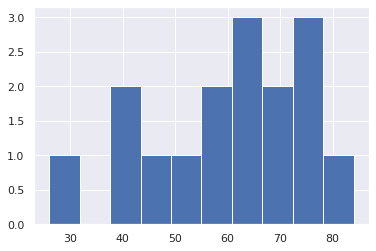

In [24]:
df_masc = df[df['SEXO'] == 'M']
df_masc["IDADE"].hist(bins=10)      

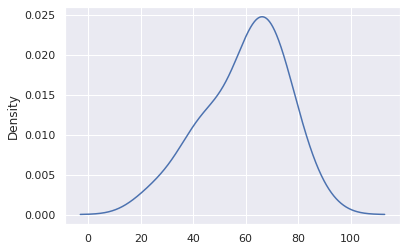

In [27]:
df_masc["IDADE"].plot.kde()

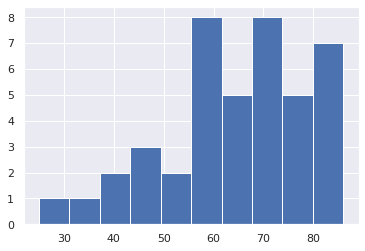

In [25]:
df_fem = df[df['SEXO'] == 'F']
df_fem["IDADE"].hist(bins=10)      

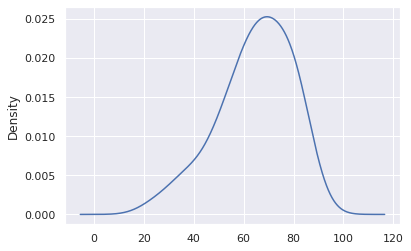

In [28]:
df_fem["IDADE"].plot.kde()

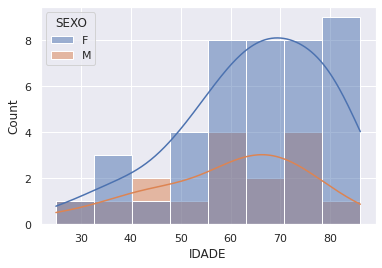

In [37]:
sns.histplot(data=df, x="IDADE", kde=True, hue="SEXO")

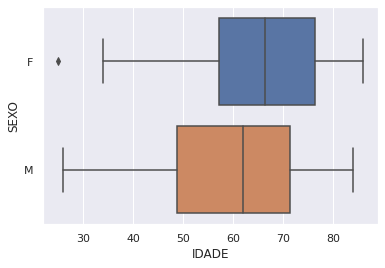

In [38]:
sns.boxplot(data=df, x="IDADE", y="SEXO")

Filtrar Dados

In [44]:
df_grouped_top = df.groupby(['DESCRICAO']).size().reset_index(name='COUNT')
df_grouped_top = df_grouped_top[df_grouped_top['COUNT'] > 5]
list_grouped = list(df_grouped_top['DESCRICAO'])
list_grouped

['Solicita coleta de caliças.',
 'Solicita coleta de entulhos diversos.',
 'Solicita coleta de lixo vegetal.']

In [46]:
df_solicitacao = df[df['DESCRICAO'].isin(list_grouped)]
df_solicitacao

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,...,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,IDADE,LOGRADOURO_ASS\t
0,9671001,Solicitação,Instituto das cidades inteligentes,2022-01-09,09:04:31,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Paulo De Deus Bessa, 667",Santo Inacio,...,Esquina com estrada mina do ouro,F,Santo Inácio,Unidade Regional Santa Felicidade,1947-12-11,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,75,"Rua Paulo De Deus Bessa, 667"
1,9670915,Solicitação,Instituto das cidades inteligentes,2022-01-09,07:53:25,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Leonardo Krasinski, 0",Boa Vista,...,"Esquina com a rua leão sallum, 1395. ciente do...",F,Boa Vista,Unidade Regional Boa Vista,1958-07-27,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,64,"Rua Leonardo Krasinski, 0"
2,9671138,Solicitação,Instituto das cidades inteligentes,2022-01-09,10:02:18,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Érico José De Mio, 21",Campina Do Siqueira,...,Obs: galhos de palmeira.,F,Campina Do Siqueira,Unidade Regional Santa Felicidade,1940-05-08,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,82,"Rua Érico José De Mio, 21"
3,9671072,Solicitação,Instituto das cidades inteligentes,2022-01-09,09:35:03,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Maria Madalena De Miranda Wolfart, 107",Boa Vista,...,"Cidadã ciente dos procedimentos de coleta, ins...",F,Boa Vista,Unidade Regional Boa Vista,1954-10-26,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,68,"Rua Maria Madalena De Miranda Wolfart, 107"
4,9671351,Solicitação,Instituto das cidades inteligentes,2022-01-09,11:28:00,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Juvenal Carvalho, 80",Fazendinha,...,Material ensacado em frente ao endereço.,F,Fazendinha,Unidade Regional Portao,1988-09-13,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,34,"Rua Juvenal Carvalho, 80"
5,9671314,Solicitação,Instituto das cidades inteligentes,2022-01-09,11:14:22,Coleta,Resíduos vegetais de jardim,Solicita coleta de lixo vegetal.,"Rua Capitão Manoel Pacheco Da Costa, 405",Ahu,...,Informa que os resíduos estão na esquina com a...,F,Ahú,Matriz,1955-04-21,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,67,"Rua Capitão Manoel Pacheco Da Costa, 405"
6,9671503,Solicitação,Instituto das cidades inteligentes,2022-01-09,12:46:07,Coleta,Entulhos diversos (pequena quantidade),Solicita coleta de entulhos diversos.,"Rua Evaristo Da Veiga, 1590",Boqueirao,...,Está do outro lado da rua em do do rio.,F,Boqueirão,Unidade Regional Boqueirao,1962-02-17,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,60,"Rua Evaristo Da Veiga, 1590"
7,9671565,Solicitação,Instituto das cidades inteligentes,2022-01-09,13:19:51,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Maurício Caillet, 135",Agua Verde,...,Ciente dos procedimentos.,F,Água Verde,Portão,1964-05-29,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,58,"Rua Maurício Caillet, 135"
8,9671924,Solicitação,Instituto das cidades inteligentes,2022-01-09,16:17:35,Coleta,Entulhos diversos (pequena quantidade),Solicita coleta de entulhos diversos.,"Rua Miguel Caluf, 26",Cajuru,...,Não informou o complemento do bairro.,F,Cajuru,Unidade Regional Cajuru,1952-11-29,Cidadão,Secretaria municipal do meio ambiente,Retirada da Pendência de Revisão,70,"Rua Miguel Caluf, 26"
9,9671995,Solicitação,Instituto das cidades inteligentes,2022-01-09,17:01:55,Coleta,Caliças até 5 carrinhos de mão,Solicita coleta de caliças.,"Rua Cidade De Antonina, 528",Cajuru,...,Material disposto na frente do endereço inform...,F,

Análise de similaridades entre solicitações de bairros

In [49]:
df_cross = pd.crosstab(df_solicitacao.DESCRICAO, df_solicitacao.BAIRRO_ASS)
df_cross.head(10)

BAIRRO_ASS,Agua Verde,Ahu,Alto Da Rua Xv,Bairro Alto,Batel,Bigorrilho,Boa Vista,Boqueirao,Cajuru,Campina Do Siqueira,...,Jardim Das Americas,Juveve,Merces,Mossungue,Novo Mundo,Reboucas,Santo Inacio,Sao Francisco,Uberaba,Vila Izabel
DESCRICAO,,,,,,,,,,,,,,,,,,,,,
Solicita coleta de caliças.,3,0,1,0,1,0,2,0,2,0,...,0,0,0,0,1,0,0,0,0,0
Solicita coleta de entulhos diversos.,0,0,0,1,0,0,0,2,2,0,...,0,0,0,0,0,0,0,1,1,0
Solicita coleta de lixo vegetal.,1,1,1,0,1,1,3,0,6,1,...,1,1,1,1,0,2,1,0,0,1


In [50]:
df_corr = df_cross.corr()
df_corr

BAIRRO_ASS,Agua Verde,Ahu,Alto Da Rua Xv,Bairro Alto,Batel,Bigorrilho,Boa Vista,Boqueirao,Cajuru,Campina Do Siqueira,...,Jardim Das Americas,Juveve,Merces,Mossungue,Novo Mundo,Reboucas,Santo Inacio,Sao Francisco,Uberaba,Vila Izabel
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,
Agua Verde,1.000000,-0.188982,0.755929,-0.755929,0.755929,-0.188982,0.500000,-0.755929,-0.188982,-0.188982,...,-0.188982,-0.188982,-0.188982,-0.188982,0.944911,-0.188982,-0.188982,-0.755929,-0.755929,-0.188982
Ahu,-0.188982,1.000000,0.500000,-0.500000,0.500000,1.000000,0.755929,-0.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-0.500000,1.000000,1.000000,-0.500000,-0.500000,1.000000
Alto Da Rua Xv,0.755929,0.500000,1.000000,-1.000000,1.000000,0.500000,0.944911,-1.000000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,0.500000
Bairro Alto,-0.755929,-0.500000,-1.000000,1.000000,-1.000000,-0.500000,-0.944911,1.000000,-0.500000,-0.500000,...,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,-0.500000
Batel,0.755929,0.500000,1.000000,-1.000000,1.000000,0.500000,0.944911,-1.000000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,0.500000
Bigorrilho,-0.188982,1.000000,0.500000,-0.500000,0.500000,1.000000,0.755929,-0.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-0.500000,1.000000,1.000000,-0.500000,-0.500000,1.000000
Boa Vista,0.500000,0.755929,0.944911,-0.944911,0.944911,0.755929,1.000000,-0.944911,0.755929,0.755929,...,0.755929,0.755929,0.755929,0.755929,0.188982,0.755929,0.755929,-0.944911,-0.944911,0.755929
Boqueirao,-0.755929,-0.500000,-1.000000,1.000000,-1.000000,-0.500000,-0.944911,1.000000,-0.500000,-0.500000,...,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,-0.500000
Cajuru,-0.188982,1.000000,0.500000,-0.500000,0.500000,1.000000,0.755929,-0.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,-0.500000,1.000000,1.000000,-0.500000,-0.500000,1.000000


In [51]:
df_corr = df_corr.style.background_gradient(cmap="RdBu")
df_corr

BAIRRO_ASS,Agua Verde,Ahu,Alto Da Rua Xv,Bairro Alto,Batel,Bigorrilho,Boa Vista,Boqueirao,Cajuru,Campina Do Siqueira,Centro,Cidade Industrial,Fazendinha,Guabirotuba,Guaira,Hauer,Jardim Botanico,Jardim Das Americas,Juveve,Merces,Mossungue,Novo Mundo,Reboucas,Santo Inacio,Sao Francisco,Uberaba,Vila Izabel
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agua Verde,1.000000,-0.188982,0.755929,-0.755929,0.755929,-0.188982,0.500000,-0.755929,-0.188982,-0.188982,0.755929,0.944911,0.944911,-0.944911,-0.188982,-0.188982,-0.755929,-0.188982,-0.188982,-0.188982,-0.188982,0.944911,-0.188982,-0.188982,-0.755929,-0.755929,-0.188982
Ahu,-0.188982,1.000000,0.500000,-0.500000,0.500000,1.000000,0.755929,-0.500000,1.000000,1.000000,0.500000,-0.500000,-0.500000,0.500000,1.000000,1.000000,-0.500000,1.000000,1.000000,1.000000,1.000000,-0.500000,1.000000,1.000000,-0.500000,-0.500000,1.000000
Alto Da Rua Xv,0.755929,0.500000,1.000000,-1.000000,1.000000,0.500000,0.944911,-1.000000,0.500000,0.500000,1.000000,0.500000,0.500000,-0.500000,0.500000,0.500000,-1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,0.500000
Bairro Alto,-0.755929,-0.500000,-1.000000,1.000000,-1.000000,-0.500000,-0.944911,1.000000,-0.500000,-0.500000,-1.000000,-0.500000,-0.500000,0.500000,-0.500000,-0.500000,1.000000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,-0.500000
Batel,0.755929,0.500000,1.000000,-1.000000,1.000000,0.500000,0.944911,-1.000000,0.500000,0.500000,1.000000,0.500000,0.500000,-0.500000,0.500000,0.500000,-1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,0.500000
Bigorrilho,-0.188982,1.000000,0.500000,-0.500000,0.500000,1.000000,0.755929,-0.500000,1.000000,1.000000,0.500000,-0.500000,-0.500000,0.500000,1.000000,1.000000,-0.500000,1.000000,1.000000,1.000000,1.000000,-0.500000,1.000000,1.000000,-0.500000,-0.500000,1.000000
Boa Vista,0.500000,0.755929,0.944911,-0.944911,0.944911,0.755929,1.000000,-0.944911,0.755929,0.755929,0.944911,0.188982,0.188982,-0.188982,0.755929,0.755929,-0.944911,0.755929,0.755929,0.755929,0.755929,0.188982,0.755929,0.755929,-0.944911,-0.944911,0.755929
Boqueirao,-0.755929,-0.500000,-1.000000,1.000000,-1.000000,-0.500000,-0.944911,1.000000,-0.500000,-0.500000,-1.000000,-0.500000,-0.500000,0.500000,-0.500000,-0.500000,1.000000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000,1.000000,1.000000,-0.500000
Cajuru,-0.188982,1.000000,0.500000,-0.500000,0.500000,1.000000,0.755929,-0.500000,1.000000,1.000000,0.500000,-0.500000,-0.500000,0.500000,1.000000,1.000000,-0.500000,1.000000,1.000000,1.000000,1.000000,-0.500000,1.000000,1.000000,-0.500000,-0.500000,1.000000


In [52]:
df_solicitacao_bairro = pd.DataFrame(df_cross.sum(), columns=['COUNT'])
df_solicitacao_bairro

,COUNT
BAIRRO_ASS,
Agua Verde,4
Ahu,1
Alto Da Rua Xv,2
Bairro Alto,1
Batel,2
Bigorrilho,1
Boa Vista,5
Boqueirao,2
Cajuru,10


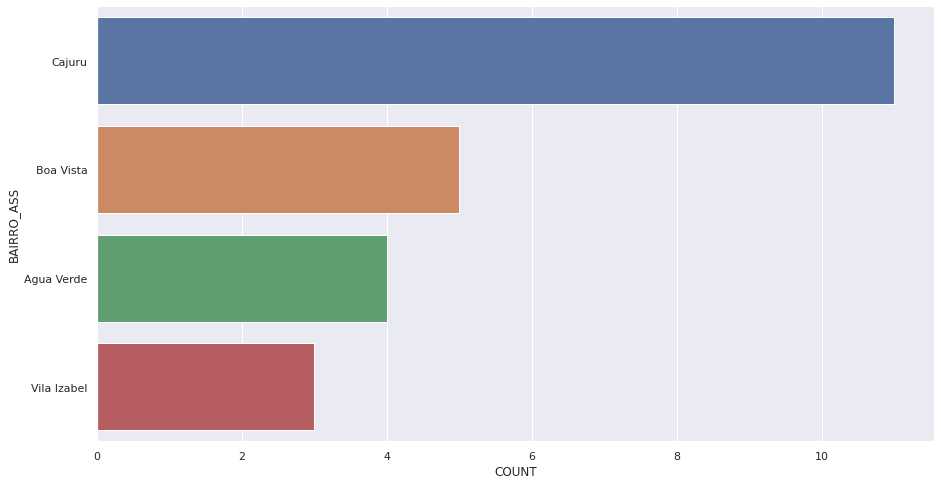

In [58]:
dfgraph = df.groupby(['BAIRRO_ASS']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 2].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="BAIRRO_ASS", orient="h")